<a href="https://colab.research.google.com/github/YY2mk/KT_aivle/blob/master/DeepLearning/DX_%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EA%B8%B0%EC%B4%88_1%EC%9D%BC%EC%B0%A8%20%EC%8B%A4%EC%8A%B5%EC%9E%90%EB%A3%8C/02%EA%B3%BC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B0%9C%EB%85%90_%EC%9D%B5%ED%9E%88%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02과 딥러닝 개념 익히기


## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

* 학습곡선 그래프

### (2) 데이터로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.학습 절차 익히기

### (1) 전처리

In [3]:
# 학습을 위한 데이터 분할
target = 'medv'
features = ['lstat']
x = data.loc[:, features]
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

# 스케일링
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
y_train_s = (y_train - y_train.min())/(y_train.max() - y_train.min())

### (2) 학습절차 시각화 함수

* 함수 생성
    * 아래 함수는 내용을 이해하려고 하지 마시고 그냥 생성해 주세요.
    * 눈으로 보여주기 위해서 만든 것입니다. 사용만 할 겁니다.

In [4]:
def dl_visualize(ep, lr) :
    clear_session()

    model = Sequential([ Dense(1, input_shape = (1,)) ])

    model.compile(loss='mse', optimizer= Adam(learning_rate = lr))
    mcp = ModelCheckpoint(filepath='/content/{epoch:d}.h5',
                        monitor='val_loss', save_best_only=False, save_weights_only=True)

    history = model.fit(x_train_s, y_train_s, verbose = 0, epochs = ep, callbacks=[mcp]).history

    coef,intercept = [],[]

    for i in range(ep) :
        file = f'/content/{i+1}.h5'
        model.load_weights(file)
        coef.append(np.array(model.weights[0])[0,0])
        intercept.append(np.array(model.weights[1])[0])

    plt.figure(figsize = (20,8))
    plt.subplot(1,2,1)
    sns.scatterplot(x=x_train_s.reshape(-1,), y=y_train_s, alpha = .5)
    plt.grid()
    plt.xlabel('lstat')
    for i in range(ep):
        x = np.linspace(0,1,10)
        y = coef[i]*x+ intercept[i]
        plt.plot(x, y, 'r--')
        v = 1.005
        plt.text(v, coef[i]*v+ intercept[i], f'ep:{i+1}', color = 'r')

    plt.subplot(1,2,2)
    plt.plot(range(1, ep+1), history['loss'], label='train_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (3) 학습 절차 눈으로 확인하기

#### 1) 실험1
* epochs를 조절해 봅시다.
    * lr = 0.01로 고정시켜 놓고
    * ep를 5, 10, 15 로 조정하며 실행해 봅시다.


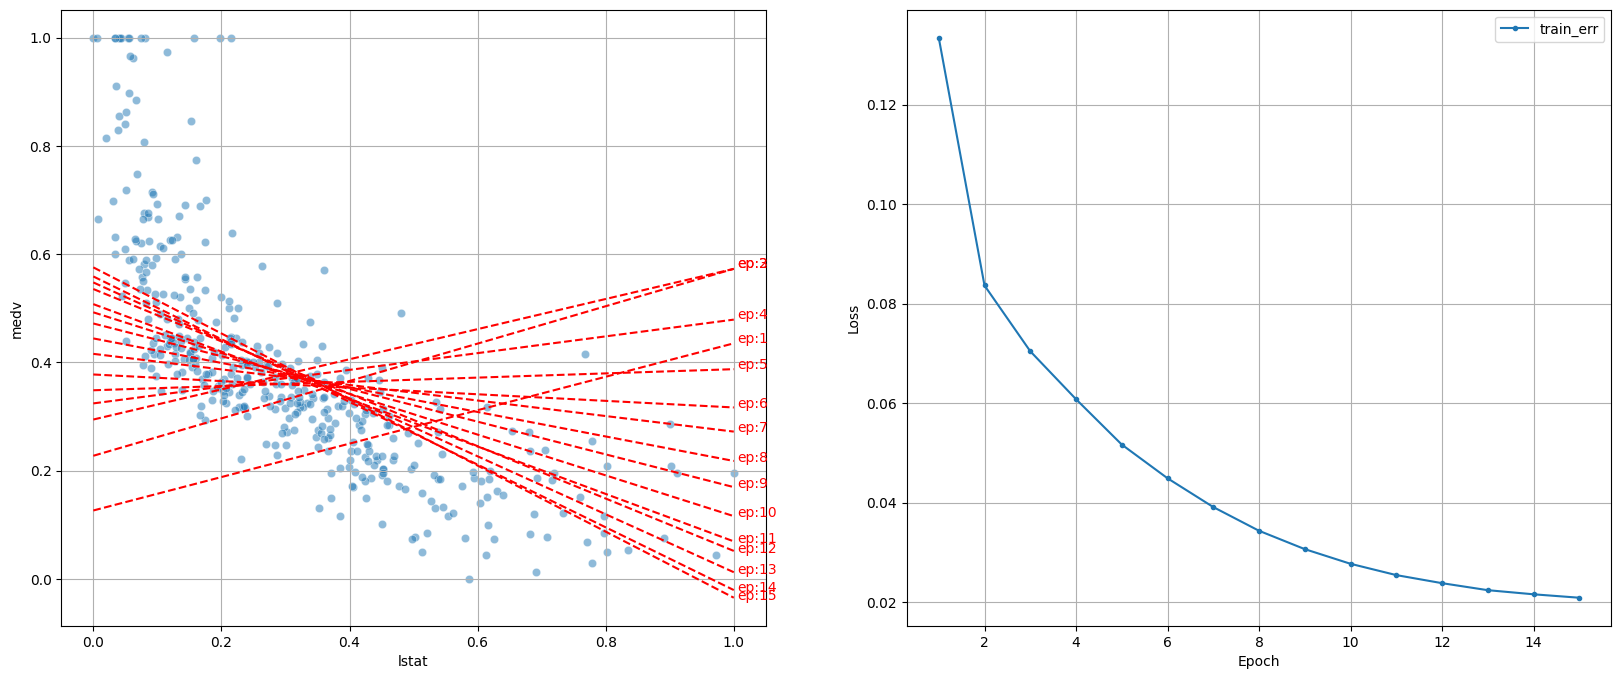

In [5]:
dl_visualize(ep = 15, lr = 0.01) # epochs 몇번 반복(15)

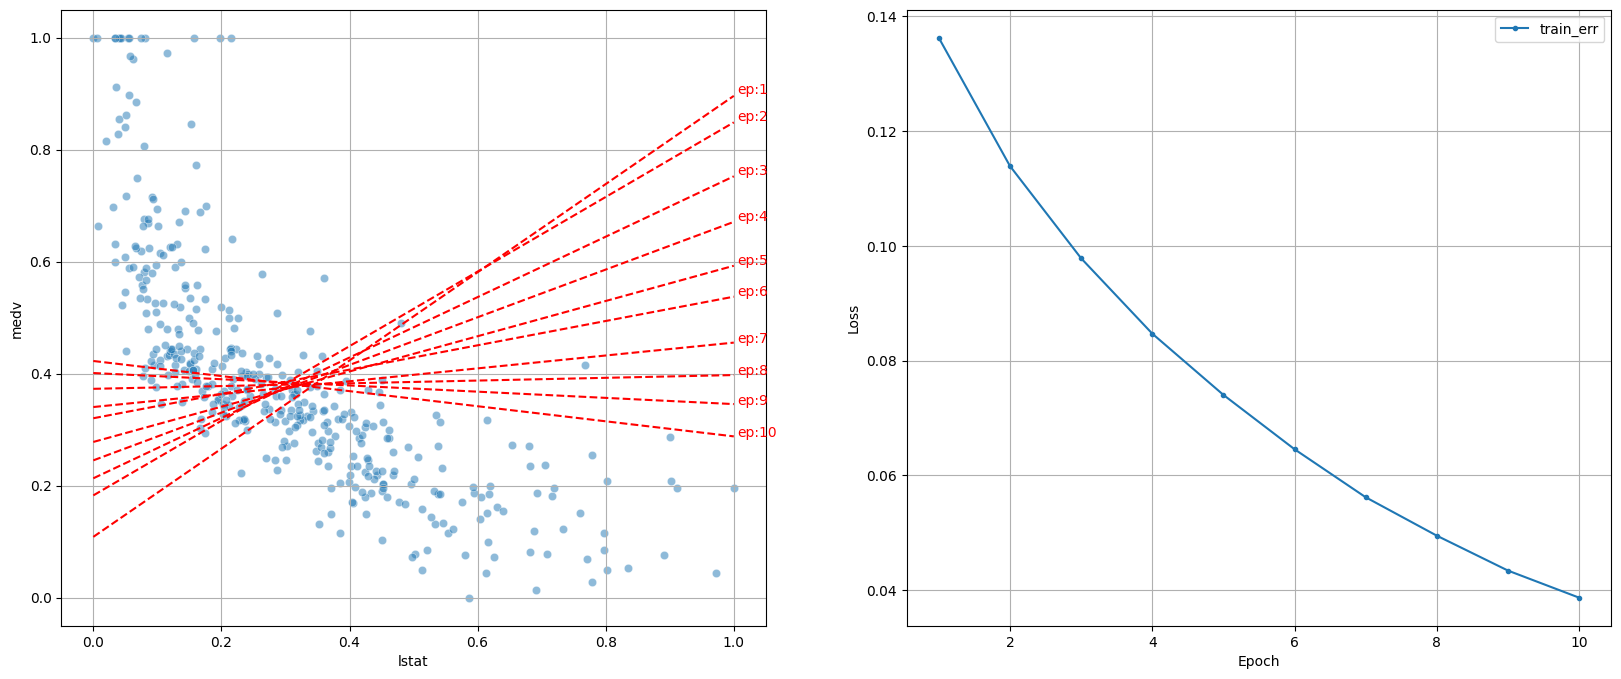

In [6]:
dl_visualize(ep = 10, lr = 0.01)

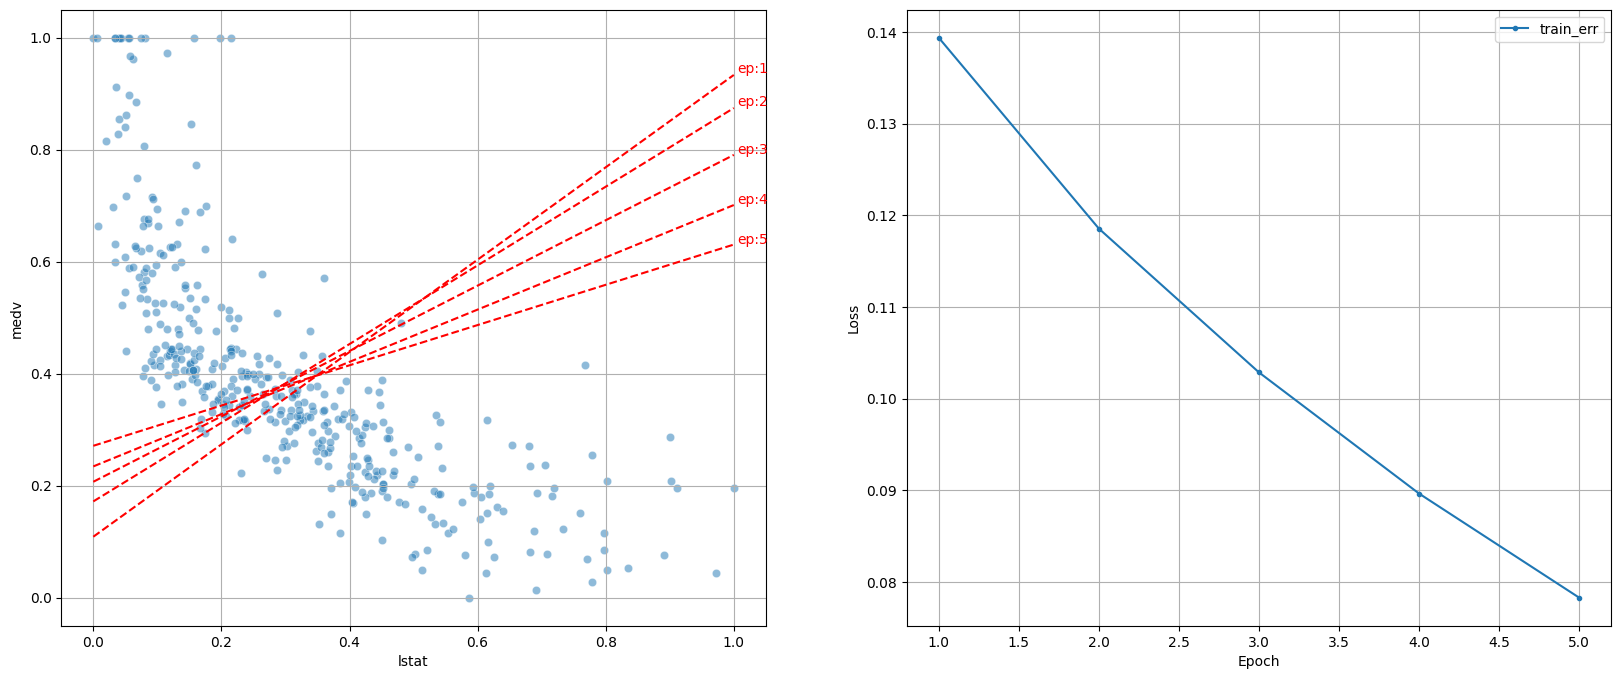

In [7]:
dl_visualize(ep = 5, lr = 0.01)

#### 2) 실험2
* epochs를 조절해 봅시다.
    * ep = 20으로 고정시켜 놓고
    * lr을 0.001, 0.01, 0.05, 0.1 로 조정하며 실행해 봅시다.


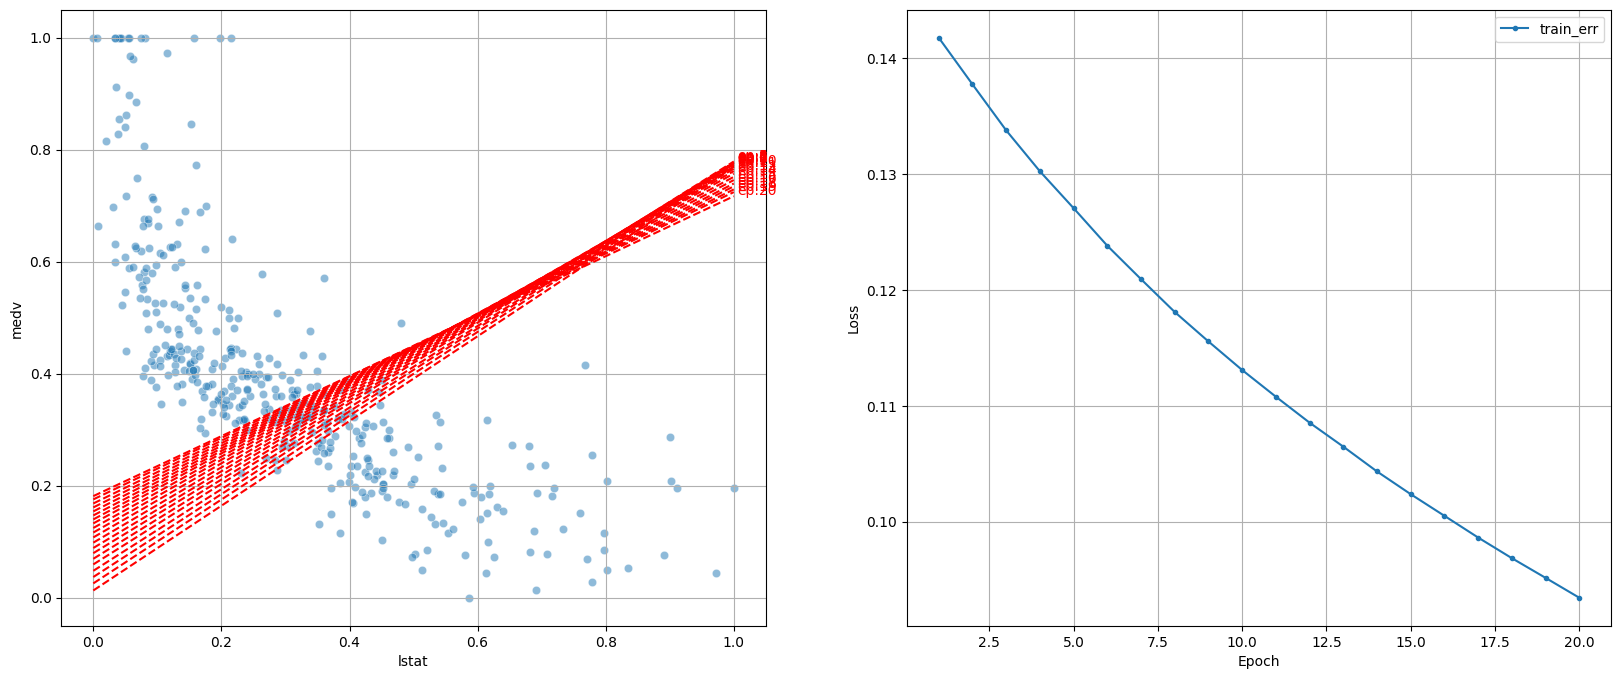

In [8]:
dl_visualize(ep = 20, lr = 0.001)

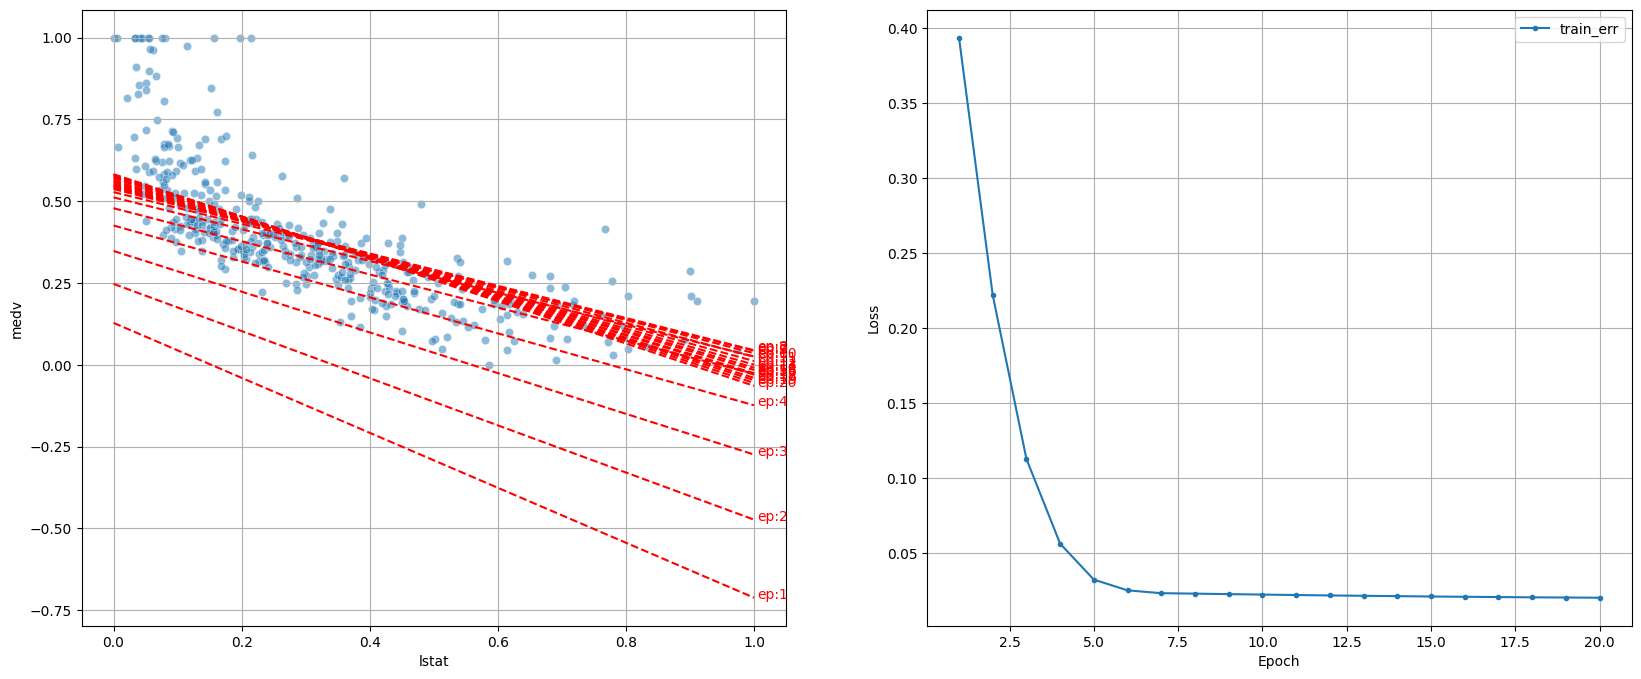

In [9]:
dl_visualize(ep = 20, lr = 0.01)

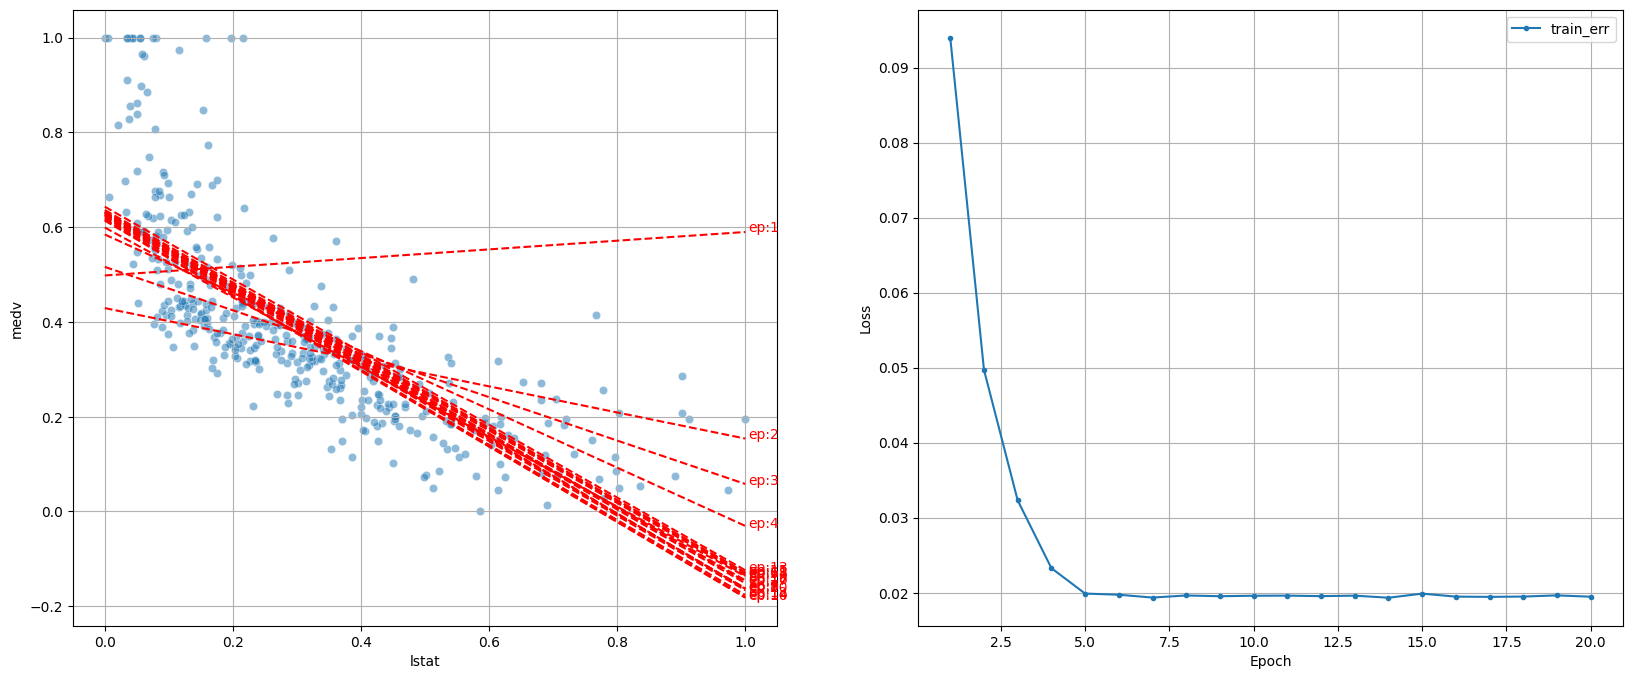

In [10]:
dl_visualize(ep = 20, lr = 0.05)

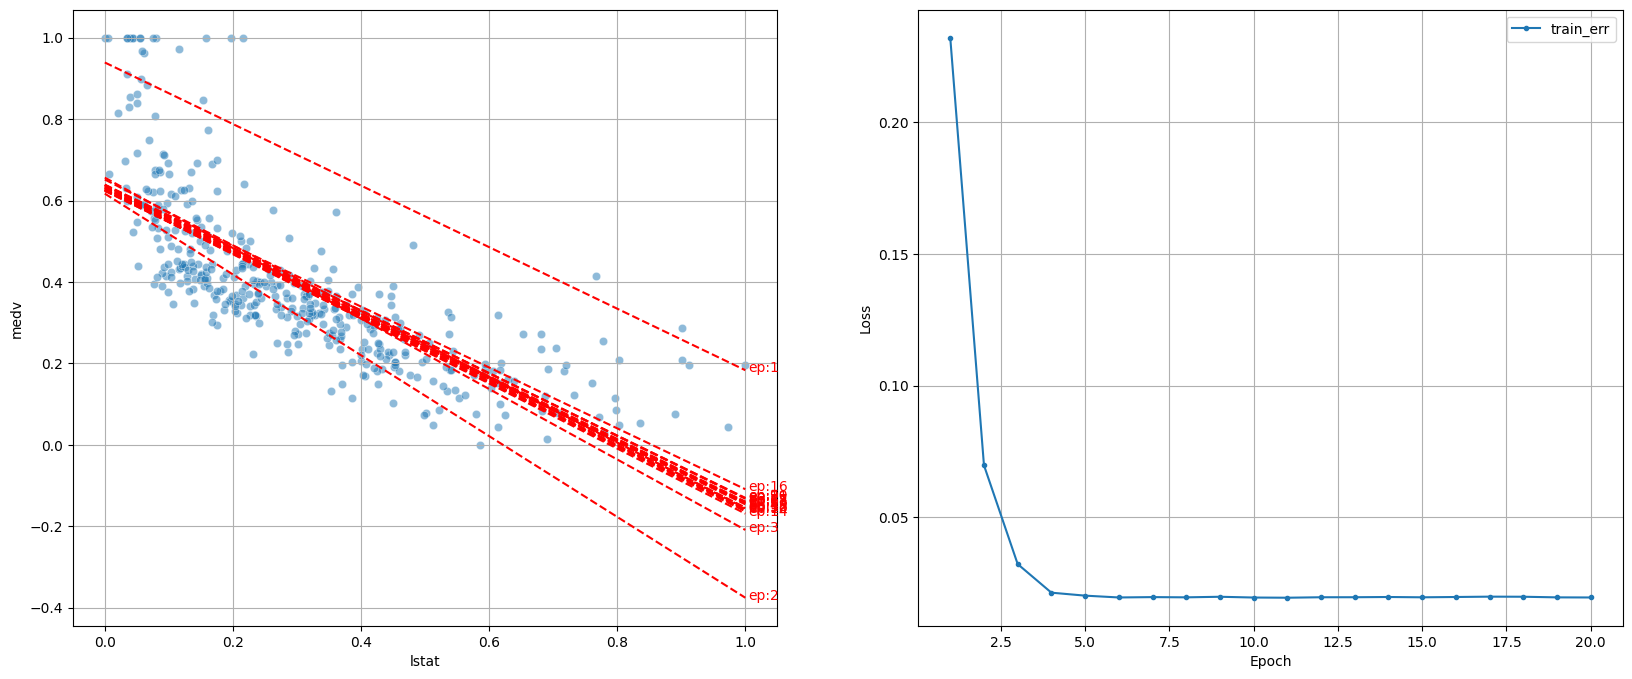

In [11]:
dl_visualize(ep = 20, lr = 0.1)